In [1]:
print('*** Программа вычисления ДПФ гармонического сигнала ***')
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer

*** Программа вычисления ДПФ гармонического сигнала ***


In [2]:
if False:
    t1 = float(input('Введите начало интервала: '))
    t2 = float(input('Введите конец интервала: '))
    N  = float(input('Введите количество точек: '))
else:
    t1 = 0
    t2 = 1
    N  = 128

In [87]:
def draw_ft(data):
    def plot_xy(xy, name, i):
        plt.subplot(2, 2, 2*i-1)
        plt.plot(xy["x"], np.real(xy["y"]),
                 'r', label=f'{name} real')
        plt.xlabel('signal')
        plt.ylabel('Time, s')
        plt.legend()
        plt.subplot(2, 2, 2*i)
        plt.plot(xy["x"], np.imag(xy["y"]),
                 'b', label=f'{name} imag')
        plt.xlabel('signal')
        plt.ylabel('Time, s')
        plt.legend()
    fig = plt.figure(figsize=(15, 10))
    image = data["image"]
    plt.plot(image["x"], image["y"].real, 'r')
    plt.xlabel('Frequency, Hz')
    plt.ylabel('Fourier-image modulus squared')
    plt.show()
    fig = plt.figure(figsize=(15, 10))
    plot_xy(data["initial"], "initial", 1)
    plot_xy(data["restored"], "restored", 2)

In [68]:
def dft(t1, t2, N):
    f0 = 2000
    mvis = 4
    fdn = 2*f0
    fdv = mvis*fdn
    t = np.arange(t1, t2, (t2-t1)/N)  # Вектор времени, с
    y = np.cos(2*np.pi*f0*t)  # Вектор сигнала
    dtime = default_timer()
    # Дискретное преобразование Фурье
    k = np.arange(N)
    Ex = np.exp(-1j*2*np.pi/N*np.outer(k, k))
    Y = np.dot(y, Ex)
    dtime = default_timer() - dtime
    # Обратное дискретное преобразование Фурье
    Ex = np.exp(-1j*2*np.pi/N*np.outer(k, k))
    ys = np.dot(Y/(N-1), Ex)

    Y2 = Y*np.conj(Y)  # Квадрат модуля Фурье-образа
    ff = k*fdv/N  # Вектор частоты, Гц
    return {
        "image": {
            "x": ff,
            "y": Y2,
        },
        "initial": {
            "x": t,
            "y": y,
        },
        "restored": {
            "x": t,
            "y": ys,
        },
        "time": dtime
    }

In [69]:
def fft(t1, t2, N):
    f0 = 2000
    mvis = 4
    fdn = 2*f0
    fdv = mvis*fdn
    t = np.arange(t1, t2, (t2-t1)/N)  # Вектор времени, с
    y = np.cos(2*np.pi*f0*t)  # Вектор сигнала
    dtime = default_timer()
    # Быстрое преобразование Фурье
    Y = np.fft.fft(y)

    dtime = default_timer() - dtime
    # Обратное дискретное преобразование Фурье

    ys = np.fft.ifft(Y)
    k = np.arange(N)
    Y2 = Y*np.conj(Y)  # Квадрат модуля Фурье-образа
    ff = k*fdv/N  # Вектор частоты, Гц
    return {
        "image": {
            "x": ff,
            "y": Y2,
        },
        "initial": {
            "x": t,
            "y": y,
        },
        "restored": {
            "x": t,
            "y": ys,
        },
        "time": dtime
    }

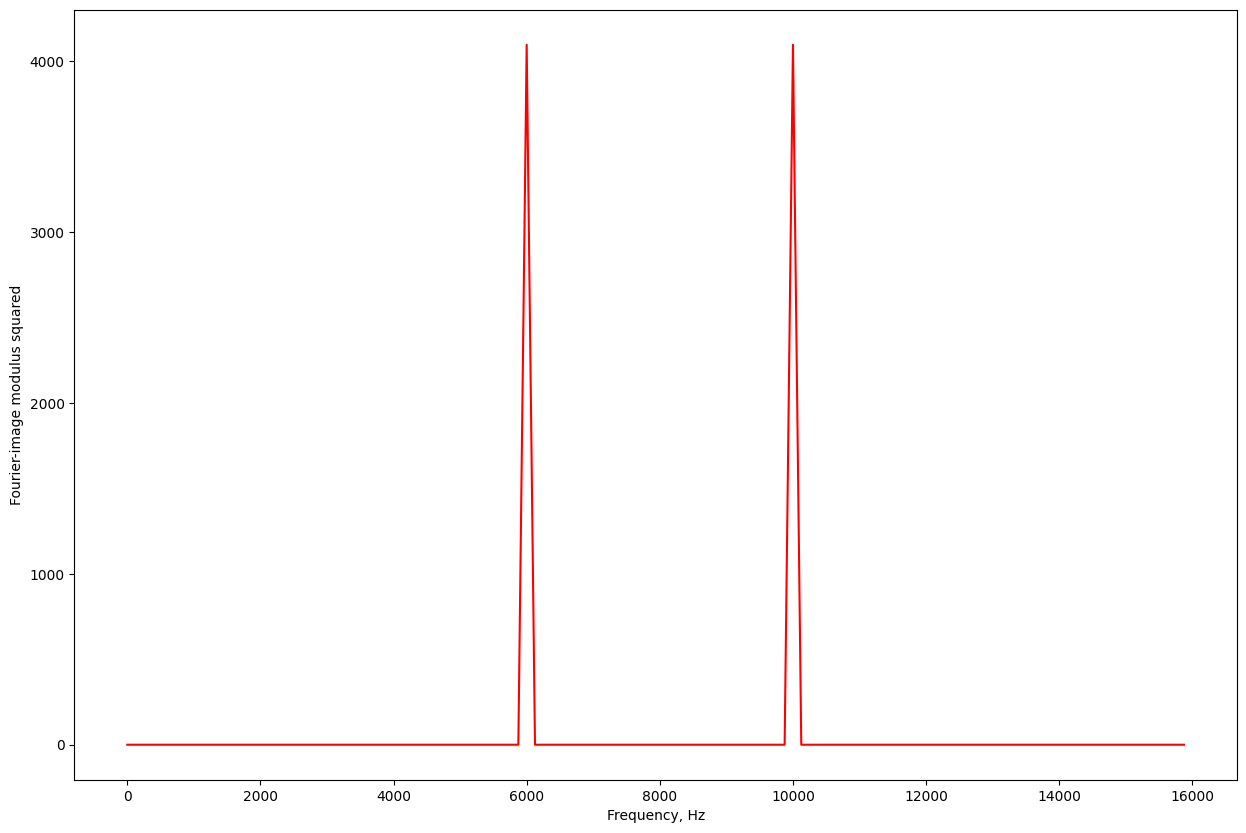

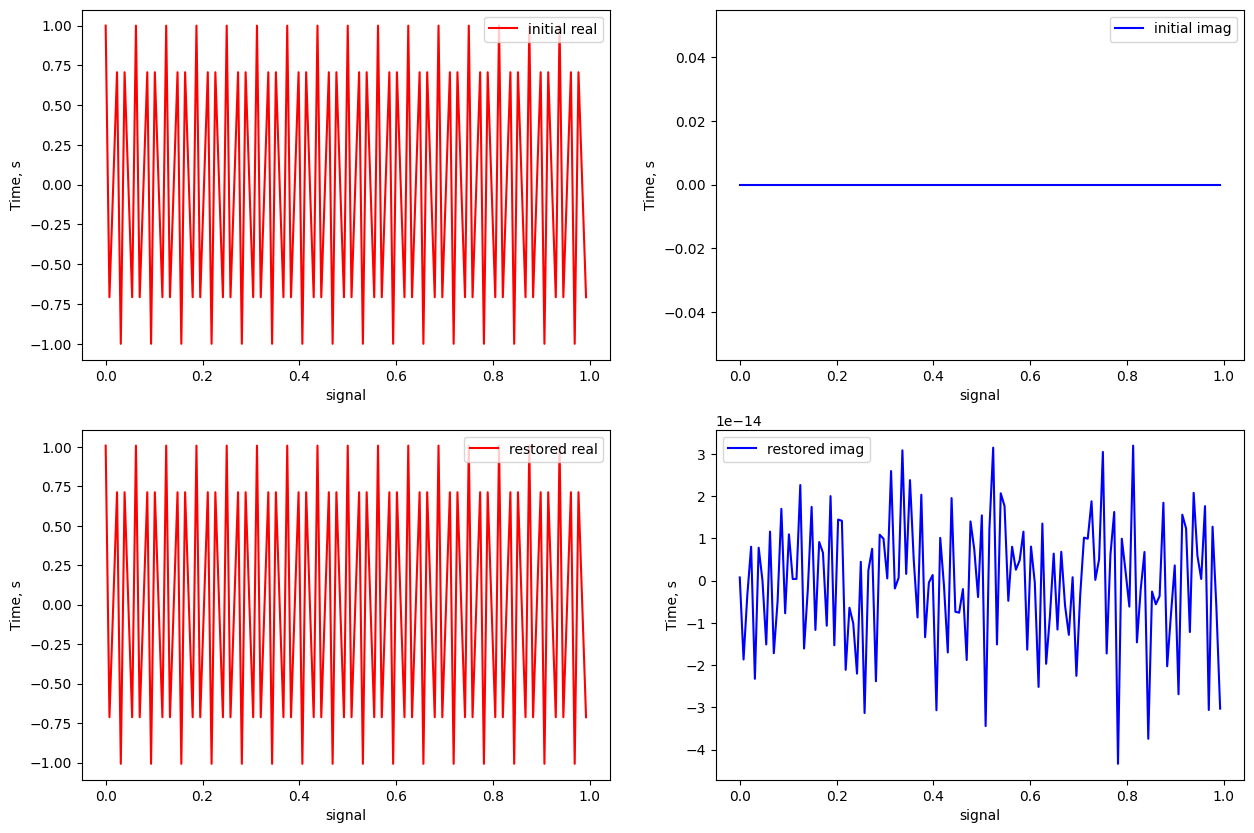

In [90]:
draw_ft(dft(t1, t2, N))

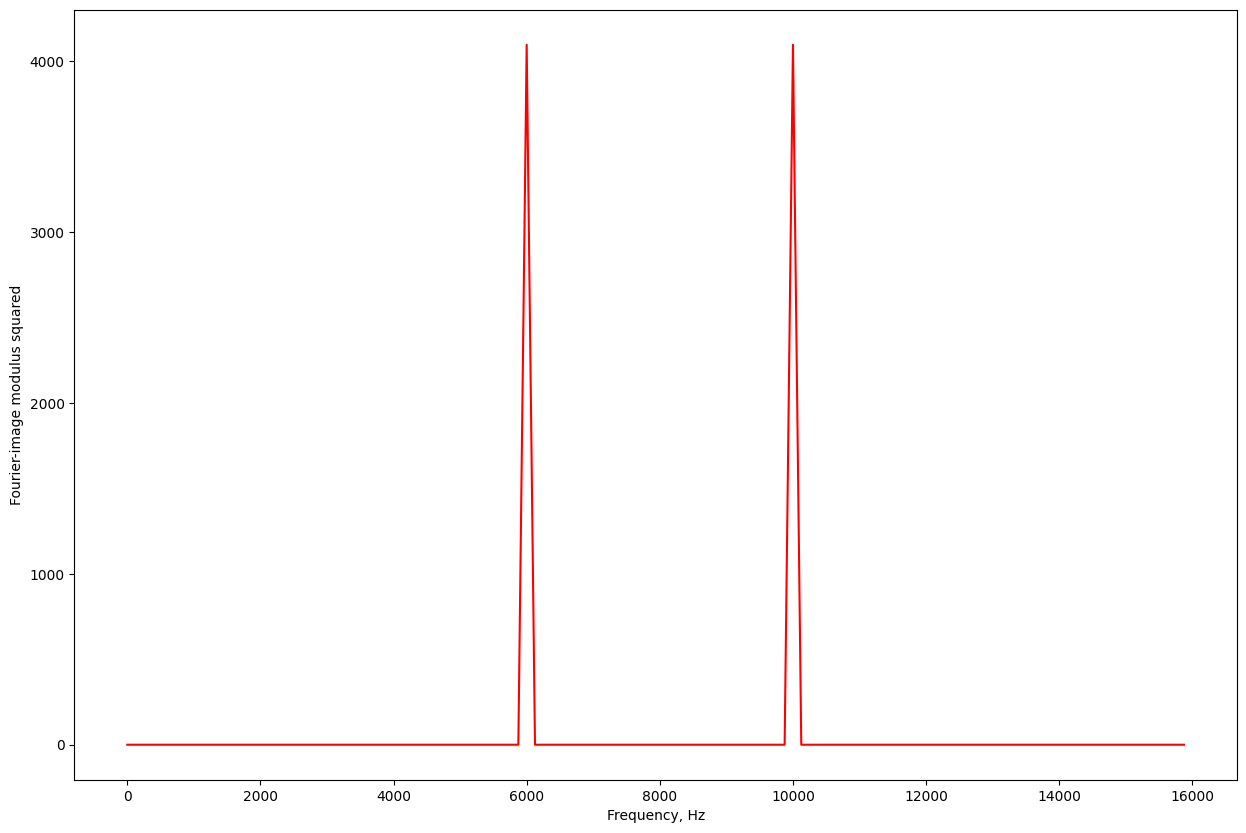

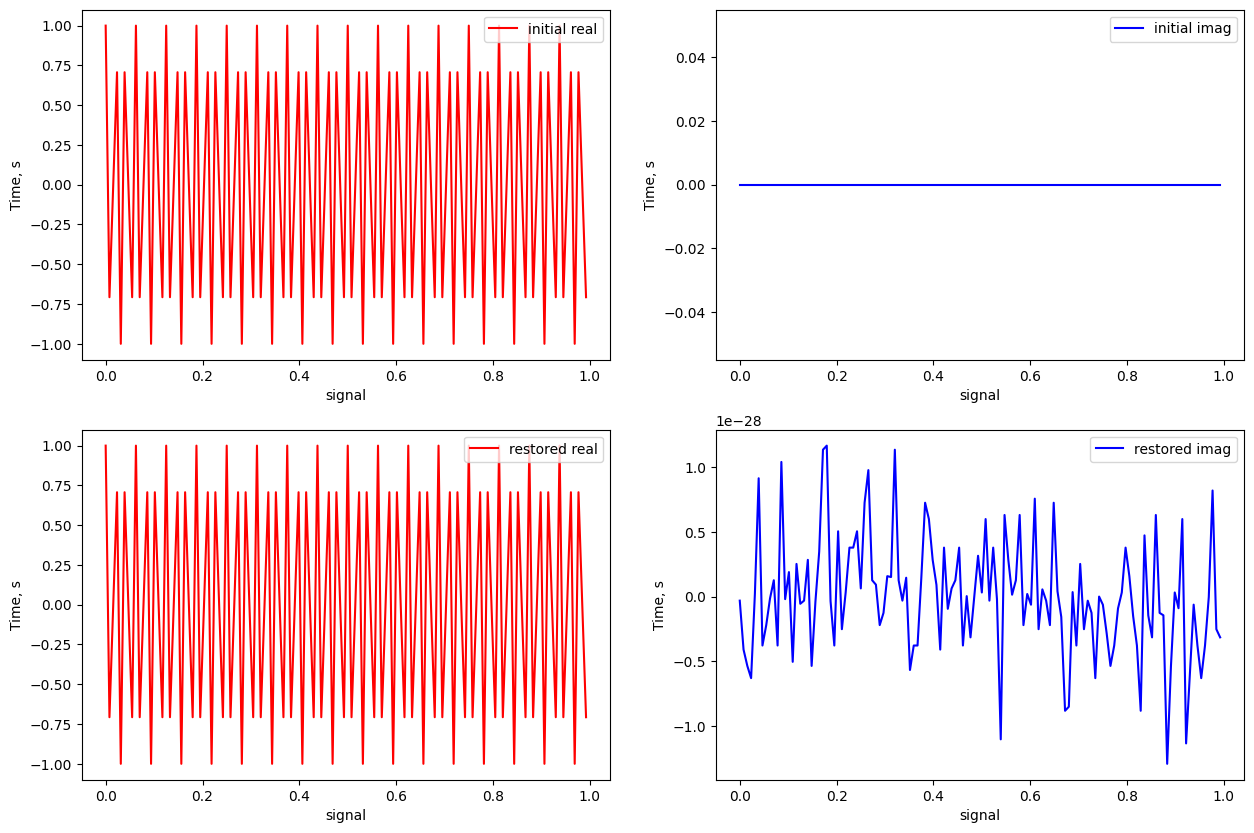

In [91]:
draw_ft(fft(t1, t2, N))

In [78]:
def calc_time(funcs, samples, caller):
    time_results = {}
    for name, func in  funcs.items():
        time_results[name] = []
        for i in samples:
            time_results[name].append(caller(func, i))
    return time_results

In [79]:
samples = list(range(1, 12, 1))
rt = calc_time(
    {"DFT": dft, "FFT": fft},
    samples,
    lambda f, i: f(t1, t2, 2**i)["time"]
)

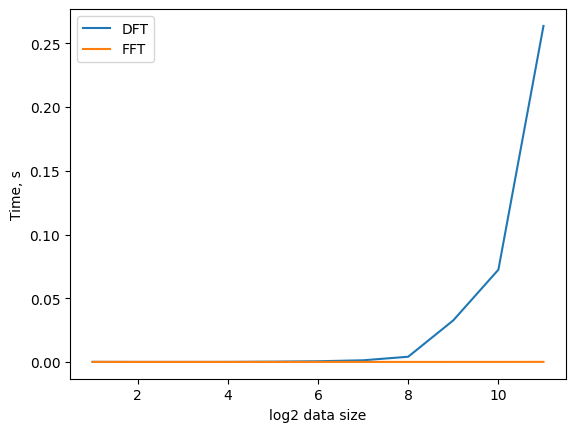

In [80]:
for name, dts in rt.items():
    plt.plot(samples, dts, label=name)
    plt.legend()
    plt.xlabel('log2 data size')
    plt.ylabel('Time, s')

In [4]:
def sigmoid(v, a):
    y = 1/(1+np.exp(-a*v))
    return y

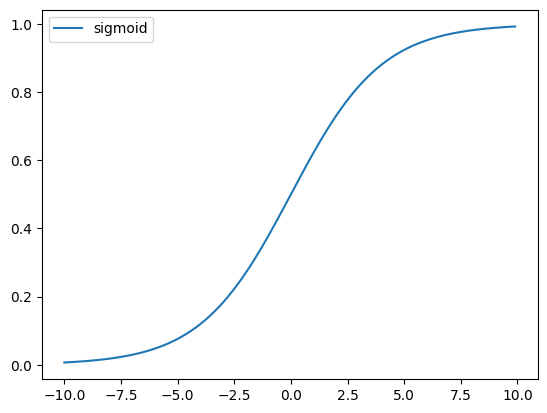

In [5]:
v=np.arange(-10, 10, 0.1)
y = sigmoid(v, 0.5)
plt.plot(v, y, label="sigmoid")
plt.legend()

In [7]:
def tanh_sigmoid(v, a):
    y = np.tanh(v/a)
    return y

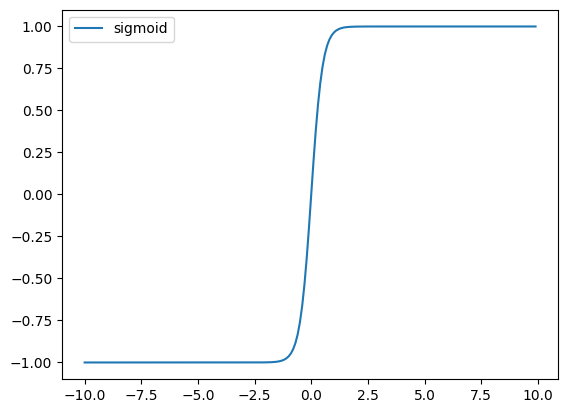

In [8]:
v=np.arange(-10, 10, 0.1)
y = tanh_sigmoid(v, 0.5)
plt.plot(v, y, label="sigmoid")
plt.legend()

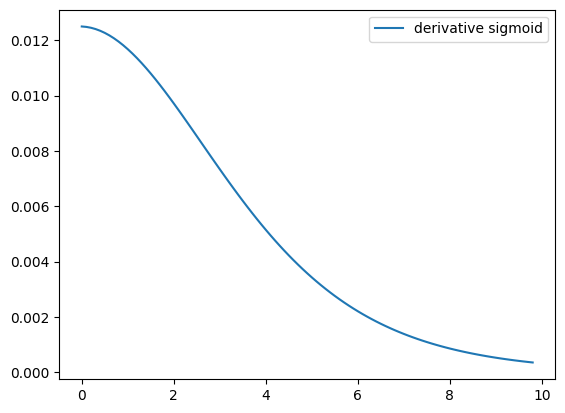

In [7]:
v=np.arange(0, 10, 0.1)
y = sigmoid(v,0.5)
dy = np.diff(y)
plt.plot(v[:-1], dy, label="derivative sigmoid")
plt.legend()

Производная сигмоидной функции:

$
\sigma (x) = \frac{1}{1+ e^{-\alpha x}}
$

$
\sigma' (x) = \frac{d}{dx} \frac{1}{1+ e^{-\alpha x}}
$

$
=\frac{d}{dx} (1+ e^{-\alpha x})^{-1}
$

$
=-(1+ e^{-\alpha x})^{-2} (-\alpha e^{-\alpha x})
$

$
=\frac{1}{1+ e^{-\alpha x}} \frac{1}{1+ e^{-\alpha x}} \alpha e^{-\alpha x}
$

$
=\alpha \sigma (x) (\frac{1+ e^{-\alpha x}-1}{1+ e^{-\alpha x}})
$

$
=\alpha \sigma (x) (1-\sigma (x))
$


In [8]:
def der_sigmoid(v, a):
    s = sigmoid(v, a)
    return a*s*(1-s)

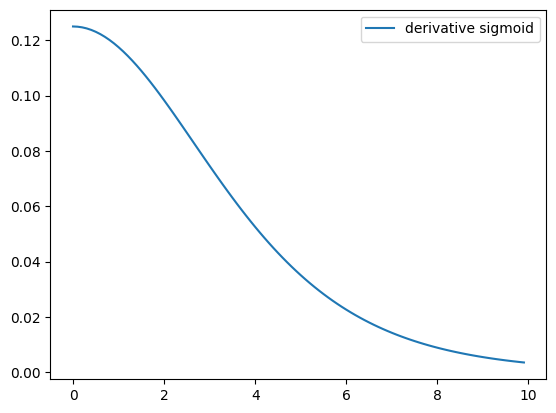

In [9]:
v=np.arange(0, 10, 0.1)
dy = der_sigmoid(v, 0.5)
plt.plot(v, dy, label="derivative sigmoid")
plt.legend()

In [19]:
x=np.arange(0, 1, 0.1)
y_sig = sigmoid(x,0.5)
y_tsig = tanh_sigmoid(x,0.5)
m = np.array([y_sig, y_tsig]).transpose()
print(m)


[[0.5        0.        ]
 [0.5124974  0.19737532]
 [0.52497919 0.37994896]
 [0.53742985 0.53704957]
 [0.549834   0.66403677]
 [0.5621765  0.76159416]
 [0.57444252 0.83365461]
 [0.58661758 0.88535165]
 [0.59868766 0.92166855]
 [0.61063923 0.94680601]]
